Note that we have manually saved the excel files as csv files, for both the training and the testing data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# autoload self-written modules
%load_ext autoreload
%autoreload 2
import models as ms
import warnings

# options on max allowable columns in pandas
pd.options.display.max_columns = None
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('data/train.csv')
train.rename(columns = {'Unnamed: 0': 'index'}, inplace=True)
train.set_index('index', inplace=True)
train

,y,rad,tex,per,area,smo,com,conc,concp,sym,fra
index,,,,,,,,,,,
1,1,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764
2,1,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658
3,1,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956
4,1,1.169878,0.160508,1.137124,1.094332,-0.123028,0.088218,0.299809,0.646366,-0.064268,-0.761662
5,1,-0.319885,0.588312,-0.183919,-0.383870,2.199903,1.682529,1.218025,1.149680,1.963872,1.571079
...,...,...,...,...,...,...,...,...,...,...,...
281,0,-0.021933,1.827549,-0.024241,-0.154836,0.208311,0.156383,-0.554182,-0.151513,-1.001736,-0.154044
282,1,0.310072,2.634331,0.470430,0.176210,0.600088,1.976019,2.084810,1.169266,1.154075,1.235403
283,1,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209


## Step 1: Coarse Model Comparison Using order-1 data

- In order to get a basic idea on the performances of multiple models, we first do coarse model comparison, including Logistic regression with L1 penalty and L2 penalty, LDA, CART, Naive Bayes, Linear Support Vector Machine with L1 and L2 penalty, LightGBM, XGBoost, Catboost. We consider AUC, accuracy, F1, and weighted F1 as the metrics.
- As for encoding of the categorical variable, we start with the most general setting: one-hot encoding. In this way, each factor level is represented by one coefficient.
- Since the data is imbalanced, although not severe, [RepeatedStratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html) is used to do cross validation. 
- All functions are in `functions.py`. Refer to this file for detailed documentation for the variables.

Findings:
- LR, LDA, SVM are the best perfoming models, and they are all linear. While for the gradient boosting methods, which are better at modeling non-linear relationship, perform worse. This suggests that a linear relationship should be more plausible.

In [3]:
## specify candidate models and evalutation metrics
# specify parameters for models
lr_l1_params = {
    'penalty': 'l1',
    'solver': 'liblinear',
    'max_iter': 200,
}
lr_l2_params = {
    'penalty': 'l2',
    'solver': 'saga',
    'max_iter': 200,
}
lda_params = {}
knn_params = {}
cart_params = {}
nb_params = {}
svm_l1_params = {
    'penalty': 'l1', 
    'loss': 'squared_hinge', 
    'dual': False, 
    'tol': 1e-3, 
}
svm_l2_params = {
    'penalty': 'l2', 
    'loss': 'squared_hinge', 
    'dual': False, 
    'tol': 1e-3, 
}
rf_params = {}
lgbm_params = {}
xgb_params = {}

# specify candidate models and corresponding parameters
model_types = ['LR', 'LR', 'LDA', 'KNN', 'CART', 'NB', 'SVM', 'SVM', 'LGBM', 'XGBoost', 'RF'] 
model_params = [lr_l1_params, lr_l2_params, lda_params, knn_params, cart_params, nb_params, \
                svm_l1_params, svm_l2_params, lgbm_params, xgb_params, rf_params]
model_names = ['LR_l1', 'LR_l2', 'LDA', 'KNN', 'CART', 'NB', 'SVM_l1', 'SVM_l2', 'LGBM', 'XGBoost', 'RF'] 

# specify evaluation metrics
scoring = {
    'auc': 'roc_auc', 
    'accuracy': 'accuracy', 
    'f1': 'f1', 
    'f1_weighted': 'f1_weighted',
}

Running LR_l1...	LR_l1 done!
Running LR_l2...	LR_l2 done!
Running LDA...	LDA done!
Running KNN...	KNN done!
Running CART...	CART done!
Running NB...	NB done!
Running SVM_l1...	SVM_l1 done!
Running SVM_l2...	SVM_l2 done!
Running LGBM...	LGBM done!
Running XGBoost...	XGBoost done!
Running RF...	RF done!
Model Comparison Diagram
It has been saved to 'images/order1/model_compare.pdf'.


<Figure size 720x576 with 0 Axes>

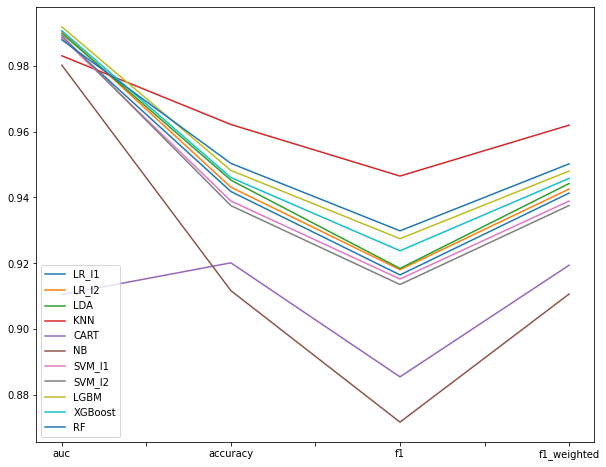

Boxplot for algorithm comparison in terms of auc.
It has been saved to 'images/order1/model_compare_auc.pdf'.


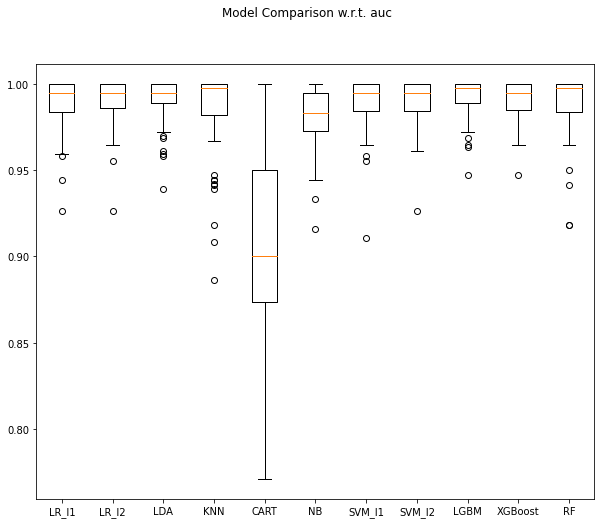

Boxplot for algorithm comparison in terms of accuracy.
It has been saved to 'images/order1/model_compare_accuracy.pdf'.


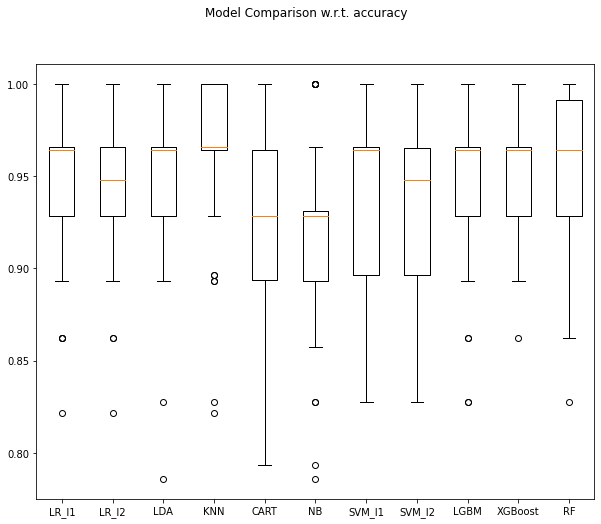

Boxplot for algorithm comparison in terms of f1.
It has been saved to 'images/order1/model_compare_f1.pdf'.


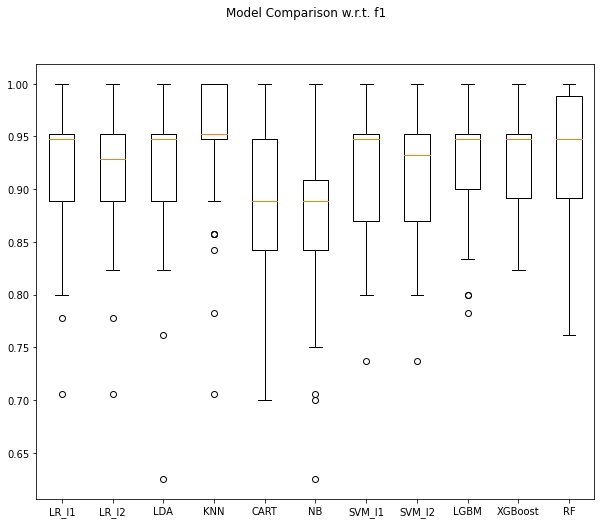

Boxplot for algorithm comparison in terms of f1_weighted.
It has been saved to 'images/order1/model_compare_f1_weighted.pdf'.


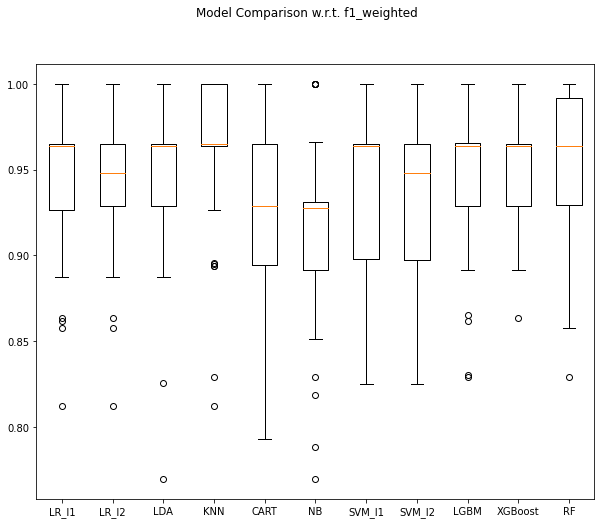

In [4]:
# model comparison
train = pd.read_csv('data/train.csv')
train.rename(columns = {'Unnamed: 0': 'index'}, inplace=True)
train.set_index('index', inplace=True)
X = train.drop(columns = ['y'])
y = train['y']
# perform model comparison
results, compare_df, compare_plot_df = ms.model_compare(X, y, model_types, model_params, \
                                                                             model_names, scoring, \
                                                                             image_dir = 'images/order1', display=True)

In [5]:
compare_df.sort_values(by=['auc', 'accuracy', 'f1', 'f1_weighted'], ascending=False)

,auc,accuracy,f1,f1_weighted
LGBM,0.99182 ( 0.01192),0.94820 ( 0.04052),0.92748 ( 0.05385),0.94802 ( 0.04033)
XGBoost,0.99063 ( 0.01148),0.94601 ( 0.03274),0.92381 ( 0.04633),0.94579 ( 0.03294)
LR_l2,0.99036 ( 0.01392),0.94310 ( 0.04030),0.91807 ( 0.06060),0.94256 ( 0.04112)
LDA,0.98982 ( 0.01342),0.94525 ( 0.04162),0.91844 ( 0.06626),0.94423 ( 0.04334)
SVM_l2,0.98919 ( 0.01426),0.93751 ( 0.04212),0.91357 ( 0.05900),0.93755 ( 0.04211)
SVM_l1,0.98854 ( 0.01618),0.93892 ( 0.04181),0.91523 ( 0.05878),0.93892 ( 0.04183)
LR_l1,0.98853 ( 0.01565),0.94180 ( 0.04172),0.91648 ( 0.06258),0.94132 ( 0.04247)
RF,0.98786 ( 0.01973),0.95034 ( 0.04226),0.92986 ( 0.06028),0.95020 ( 0.04239)
KNN,0.98301 ( 0.02726),0.96214 ( 0.04200),0.94650 ( 0.06057),0.96195 ( 0.04253)
NB,0.98017 ( 0.01751),0.91170 ( 0.05034),0.87178 ( 0.07917),0.91068 ( 0.05203)


l2 outperforms l1, suggesting that the model is not sparse.

Finer Model Comparison Diagram


<Figure size 576x432 with 0 Axes>

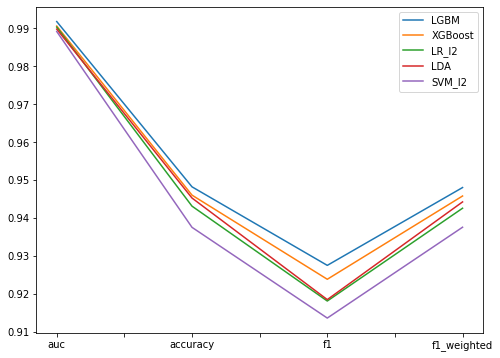

In [6]:
# take a closer look at the comparison plot
plt.rcParams["figure.figsize"] = (8,6)
plt.figure()
compare_plot_df[['LGBM', 'XGBoost', 'LR_l2', 'LDA', 'SVM_l2']].plot()
plt.legend(loc='best')
print(f"Finer Model Comparison Diagram")
plt.savefig("images/order1/top5_model_compare.pdf")
plt.show()

## Step 2: Coarse Model Comparison Using order-2 data

The performances of the models get boosted when using order-2 data, suggesting that we need to use interaction terms and quadratic terms.

Running LR_l1...	LR_l1 done!
Running LR_l2...	LR_l2 done!
Running LDA...	LDA done!
Running KNN...	KNN done!
Running CART...	CART done!
Running NB...	NB done!
Running SVM_l1...	SVM_l1 done!
Running SVM_l2...	SVM_l2 done!
Running LGBM...	LGBM done!
Running XGBoost...	XGBoost done!
Running RF...	RF done!
Model Comparison Diagram
It has been saved to 'images/order2/model_compare.pdf'.


<Figure size 720x576 with 0 Axes>

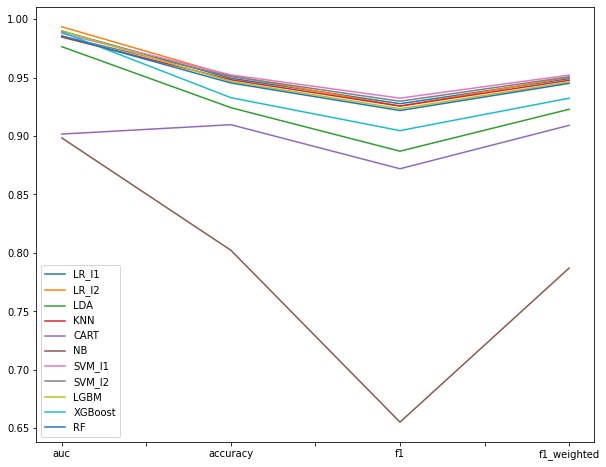

Boxplot for algorithm comparison in terms of auc.
It has been saved to 'images/order2/model_compare_auc.pdf'.


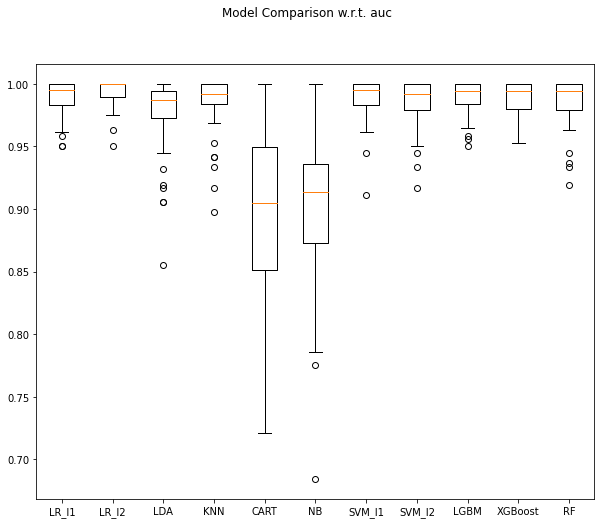

Boxplot for algorithm comparison in terms of accuracy.
It has been saved to 'images/order2/model_compare_accuracy.pdf'.


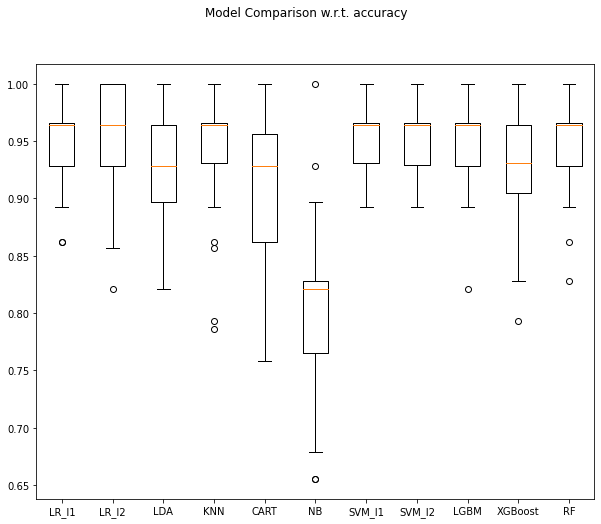

Boxplot for algorithm comparison in terms of f1.
It has been saved to 'images/order2/model_compare_f1.pdf'.


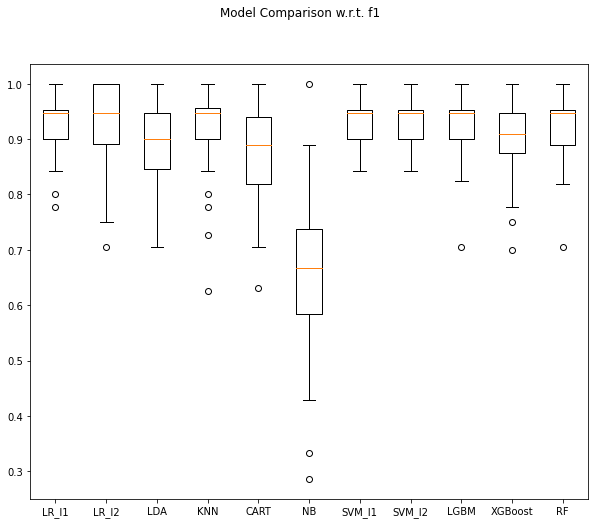

Boxplot for algorithm comparison in terms of f1_weighted.
It has been saved to 'images/order2/model_compare_f1_weighted.pdf'.


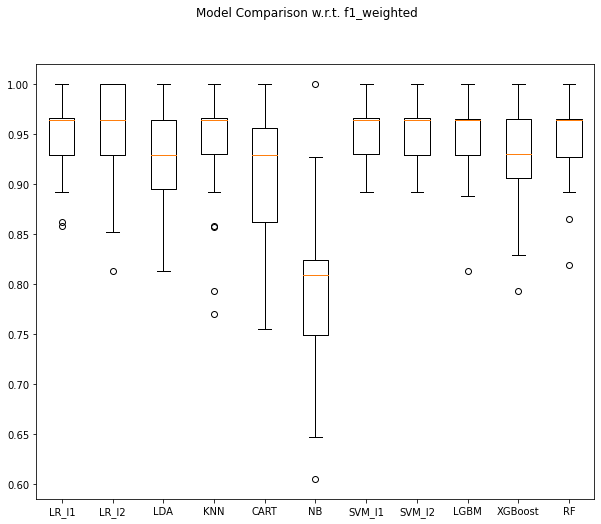

In [6]:
# model comparison using order-2 data
train2 = pd.read_csv('data/train2.csv')
train2.rename(columns = {'Unnamed: 0': 'index'}, inplace=True)
train2.set_index('index', inplace=True)
X2 = train2.drop(columns = ['y'])
y2 = train2['y']
# perform model comparison
results2, compare_df2, compare_plot_df2 = ms.model_compare(X2, y2, model_types, model_params, \
                                                                             model_names, scoring, \
                                                                             image_dir = 'images/order2', display=True)

In [7]:
compare_df2.sort_values(by=['auc', 'accuracy', 'f1', 'f1_weighted'], ascending=False)

,auc,accuracy,f1,f1_weighted
LR_l2,0.99345 ( 0.01023),0.95148 ( 0.04392),0.92564 ( 0.07102),0.95023 ( 0.04575)
LGBM,0.99013 ( 0.01293),0.94670 ( 0.03533),0.92336 ( 0.05416),0.94616 ( 0.03630)
LR_l1,0.98980 ( 0.01346),0.94943 ( 0.03780),0.92763 ( 0.05483),0.94912 ( 0.03808)
XGBoost,0.98883 ( 0.01226),0.93278 ( 0.04316),0.90460 ( 0.06253),0.93236 ( 0.04362)
SVM_l1,0.98778 ( 0.01753),0.95227 ( 0.03116),0.93240 ( 0.04520),0.95211 ( 0.03134)
RF,0.98554 ( 0.01900),0.94539 ( 0.03886),0.92181 ( 0.05763),0.94501 ( 0.03941)
SVM_l2,0.98544 ( 0.01887),0.95094 ( 0.03122),0.92974 ( 0.04605),0.95065 ( 0.03150)
KNN,0.98463 ( 0.02232),0.94815 ( 0.04824),0.92561 ( 0.07321),0.94770 ( 0.04948)
LDA,0.97643 ( 0.02980),0.92424 ( 0.04453),0.88702 ( 0.07122),0.92286 ( 0.04621)
CART,0.90165 ( 0.06441),0.90968 ( 0.05605),0.87198 ( 0.08210),0.90913 ( 0.05657)


Finer Model Comparison Diagram


<Figure size 576x432 with 0 Axes>

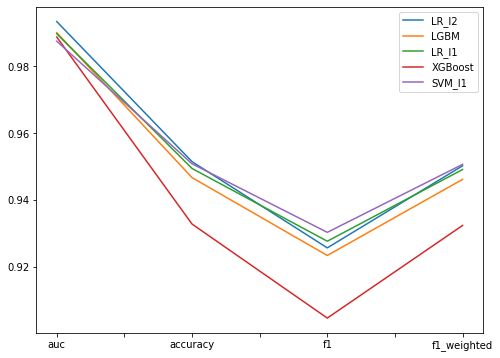

In [9]:
# take a closer look at the comparison plot
plt.rcParams["figure.figsize"] = (8,6)
plt.figure()
compare_plot_df2[['LR_l2', 'LGBM', 'LR_l1', 'XGBoost', 'SVM_l1']].plot()
plt.legend(loc='best')
print(f"Finer Model Comparison Diagram")
plt.savefig("images/order1/top5_model_compare.pdf")
plt.show()

## Step 3: Dive deeper into L2-regularized LR

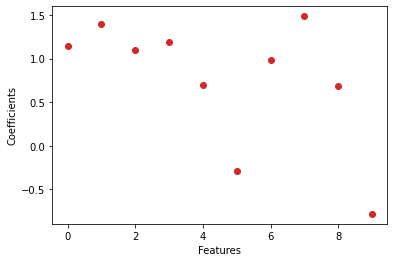

The image has been saved to 'images/order1/lr_coef.pdf'.


,rad,tex,per,area,smo,com,conc,concp,sym,fra
0,1.149286,1.395954,1.101068,1.184242,0.69976,-0.292903,0.98923,1.485217,0.680763,-0.781035


In [12]:
coef_df = ms.model_coef(X, y, 'LR', 'images/order1/lr_coef.pdf', 0, **lr_l2_params)
coef_df

In [13]:
print("Important features:")
print(coef_df.columns[abs(coef_df.iloc[0, :]) > 0.5].tolist())

Important features:
['rad', 'tex', 'per', 'area', 'smo', 'conc', 'concp', 'sym', 'fra']


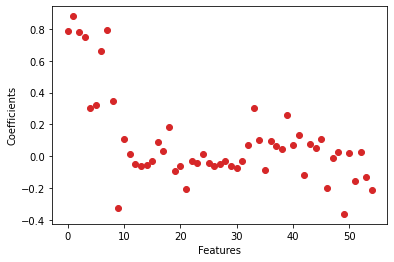

The image has been saved to 'images/order2'.


,rad,tex,per,area,smo,com,conc,concp,sym,fra,rad.tex,rad.area,rad.smo,rad.com,rad.concp,rad.sym,tex.per,tex.area,tex.smo,tex.com,tex.conc,tex.fra,per.smo,per.com,per.conc,per.concp,area.smo,area.com,area.conc,area.concp,area.sym,area.fra,smo.com,smo.conc,smo.concp,smo.sym,smo.fra,com.conc,com.concp,com.sym,conc.concp,conc.sym,conc.fra,concp.sym,concp.fra,sym.fra,tex.2,per.2,area.2,smo.2,com.2,conc.2,concp.2,sym.2,fra.2
0,0.78757,0.878878,0.781278,0.751027,0.303443,0.323331,0.663502,0.792367,0.34628,-0.3229,0.107944,0.014585,-0.050215,-0.057686,-0.054179,-0.030881,0.090974,0.036145,0.185667,-0.094337,-0.06122,-0.205682,-0.029842,-0.044173,0.017928,-0.042396,-0.059691,-0.050731,-0.027102,-0.061766,-0.073038,-0.028296,0.070262,0.304647,0.099875,-0.083735,0.094943,0.065213,0.048405,0.260178,0.071743,0.131364,-0.118345,0.080225,0.055271,0.109142,-0.198839,-0.011337,0.02708,-0.360752,0.01828,-0.152638,0.028479,-0.131365,-0.210294


In [15]:
coef_df2 = ms.model_coef(X2, y2, 'LR', 'images/order2', 0.01, **lr_l2_params)
coef_df2

In [16]:
print("Important features:")
print(coef_df2.columns[abs(coef_df2.iloc[0, :]) > 0.1].tolist())

Important features:
['rad', 'tex', 'per', 'area', 'smo', 'com', 'conc', 'concp', 'sym', 'fra', 'rad.tex', 'tex.smo', 'tex.fra', 'smo.conc', 'com.sym', 'conc.sym', 'conc.fra', 'sym.fra', 'tex.2', 'smo.2', 'conc.2', 'sym.2', 'fra.2']


## Step 3: Check feature importance

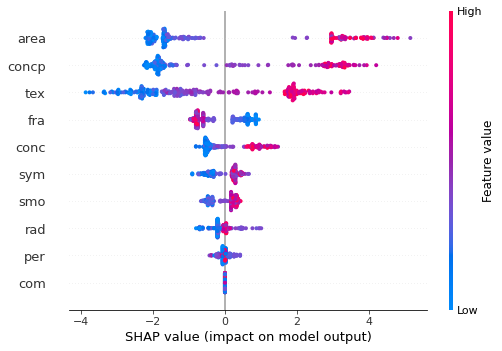

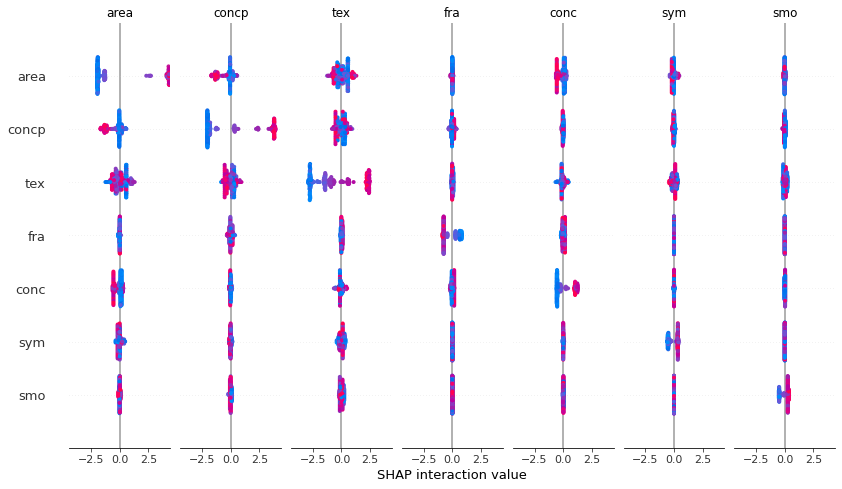

,feature,importance
0,area,0.566158
1,concp,0.154327
2,conc,0.110751
3,tex,0.063369
4,rad,0.030874
5,sym,0.026289
6,per,0.023220
7,fra,0.013743
8,smo,0.011268
9,com,0.000000


In [17]:
feature_imp = ms.feature_importance(X, y, 'XGBoost', **xgb_params)
feature_imp

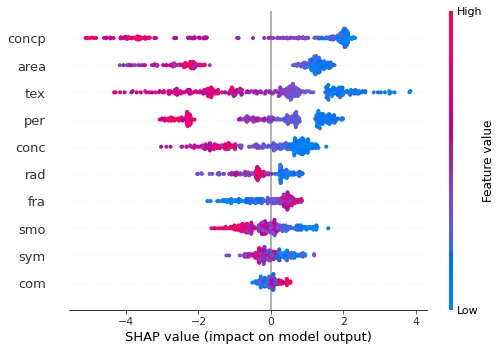

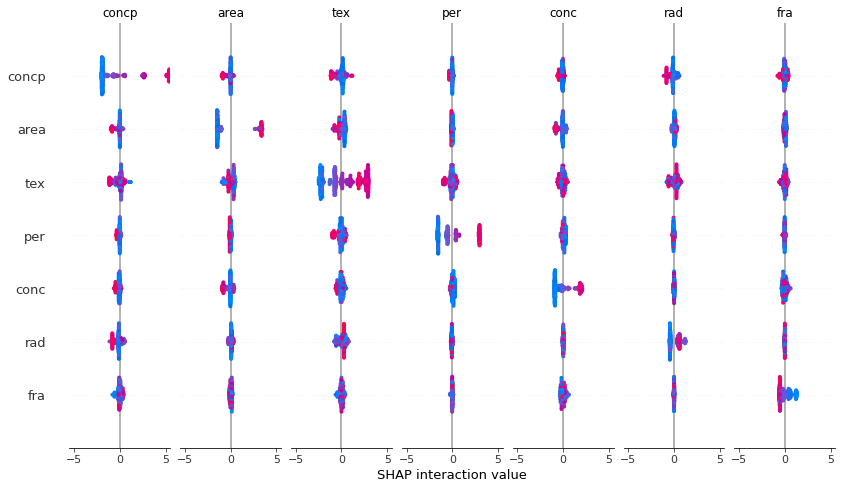

,feature,importance
0,tex,229
1,concp,112
2,smo,111
3,fra,111
4,conc,104
5,per,90
6,sym,88
7,rad,77
8,area,72
9,com,69


In [18]:
feature_imp = ms.feature_importance(X, y, 'LGBM', **lgbm_params)
feature_imp

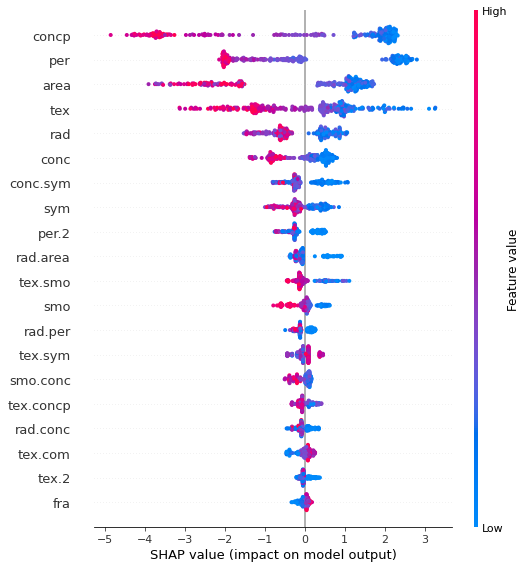

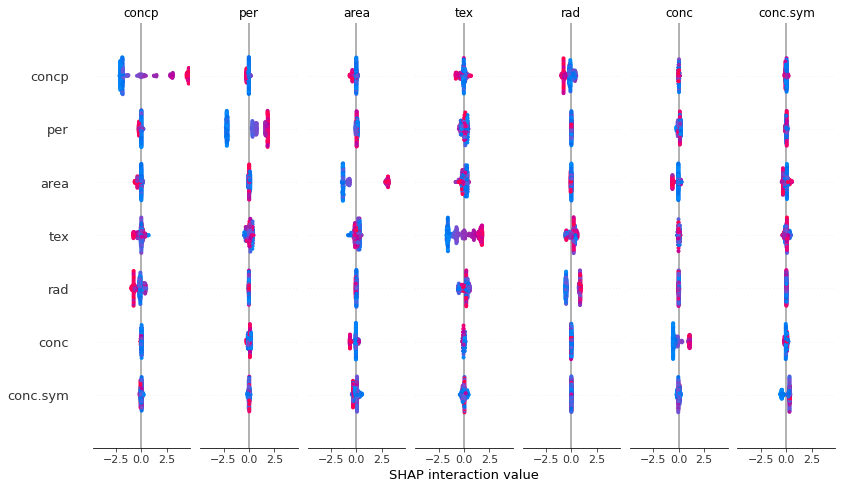

,feature,importance
0,tex,94
1,concp,61
2,area,43
3,tex.smo,39
4,rad,38
...,...,...
60,fra.2,3
61,area.sym,2
62,com.concp,2
63,per.area,1


In [19]:
feature_imp = ms.feature_importance(X2, y2, 'LGBM', **lgbm_params)
feature_imp

## Step 4: Estimation

Note that if the data is linearly separable, then the coefficients could be inflated to large values. In this case, estimating doesn't make much sense.

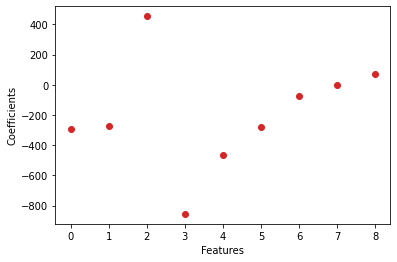

The image has been saved to 'images/devfinal/lr_coef.pdf'.


,V2,V4,V6,V7,V8,V4.V8,V6.V7,V7.V8,V7.2
0,-291.263899,-273.19624,454.076908,-855.633048,-462.316675,-279.333967,-72.891929,-1.233146,69.129193


In [142]:
# lr estimation
train = pd.read_csv('data/dev_final.csv')
train.rename(columns = {'Unnamed: 0': 'index'}, inplace=True)
train.set_index('index', inplace=True)
train = train[['V2', 'V4', 'V6', 'V7', 'V8', 'y']]
train['V4.V8'] = train['V4'] * train['V8']
train['V6.V7'] = train['V6'] * train['V7']
train['V7.V8'] = train['V7'] * train['V8']
train['V7.2'] = train['V7'] * train['V7']
X = train.drop(columns = ['y'])
y = train['y']

lr_params = {
    'penalty': 'none',
    'max_iter': 600,
}
coef_df = ms.model_coef(X, y, 'LR', 'images/devfinal/lr_coef.pdf', 0, **lr_params)
coef_df

## Prediction

After exploration, we reach our final classifier:
$$
0.5\times (1 - \text{Sign}(X_2 + X_3 + X_4 + X_6 + X_7 + X_{11} + X_{15} + X_{17} + X_{19} + X_{20} + X_{21} + 
X_{22} + X_{25} + X_{26} + X_{27} + X_{C})).
$$


### Check the prediction on the train set

In [3]:
from sklearn.metrics import f1_score

In [4]:
# read in and encode train data
train = pd.read_csv('../data/train.csv')
train = ms.encode(train, 'ordinal')

# make predictions
train_Z = train['X2'] + train['X3'] + train['X4'] + train['X6'] + train['X7'] + train['X11'] + train['X15'] + train['X17'] + \
        train['X19'] + train['X20'] + train['X21'] + train['X22'] + train['X25'] + train['X26'] + train['X27'] + train['XC']
train_pred = round(0.5 * (1 - np.sign(train_Z))).astype(int)

# evaluate predictions
print(f"The F1 score on the training set is: {f1_score(train['y'], train_pred)}.")

# get the decision boundary
margin = (max(train_Z[train_Z < 0]), min(train_Z[train_Z > 0]))
print(f"The decision boundary of the SVM classifier is: {margin}.")

The F1 score on the training set is: 1.0.
The decision boundary of the SVM classifier is: (-0.0027541669145945136, 0.0013290685396867286).


### Make prediction on the test set

In [5]:
# read in and encode test data
test = pd.read_csv('../data/test.csv')
test = ms.encode(test, 'ordinal')

# make prediction
Z = test['X2'] + test['X3'] + test['X4'] + test['X6'] + test['X7'] + test['X11'] + test['X15'] + test['X17'] + \
        test['X19'] + test['X20'] + test['X21'] + test['X22'] + test['X25'] + test['X26'] + test['X27'] + test['XC']
test['prediction_score'] = round(0.5 * (1 - np.sign(Z))).astype(int)

# check how many decison values fall into the margin 
print(f"Predictive uncertainty analysis: ")
print(f"{sum((Z >= margin[0]) & (Z <= margin[1]))} out of {test.shape[0]} would fall into the decision boundary.")

# save the prediction file
test.to_csv('../data/pred.csv', index=False)

Predictive uncertainty analysis: 
1 out of 7000 would fall into the decision boundary.
